# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [4]:
# number of callbacks for black-sounding names
print('callbacks for black-sounding names = ',sum(data[data.race=='b'].call))

# number of NO callbacks for black-sounding names
print('NO callbacks for black-sounding names = ',len(data[data.race=='b']) - sum(data[data.race=='b'].call))

# number of callbacks for white-sounding names
print('callbacks for white-sounding names = ',sum(data[data.race=='w'].call))

# number of NO callbacks for white-sounding names
print('NO callbacks for white-sounding names = ',len(data[data.race=='w']) - sum(data[data.race=='w'].call))

callbacks for black-sounding names =  157.0
NO callbacks for black-sounding names =  2278.0
callbacks for white-sounding names =  235.0
NO callbacks for white-sounding names =  2200.0


### Q1: What test is appropriate for this problem? Does CLT apply?
**z-test** is appropriate for this problem as our sample size is big. **Central Limit Theorem** can be applied here as the following 3 conditions are met:

* **Random:** the problem stated that researchers "randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers". Our data are random.



* **Normality:** the number of successes and failures in each group (white-sounding or black-sounding) are larger than 10. The sampling distribution of sample proportion is approximate normal.



* **Independent:** we can assum our data are independent in this case.

### Q2: What are the null and alternate hypotheses?

**Null hypothesis :** the expected numbers of callbacks for black-sounding names and white-sounding names are the same.


**Alternate hypothesis :** the expected numbers of callbacks for black-sounding names and white-sounding names are NOT the same.

**Significance Level: 0.05**

### Q3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

ww = w.call
bb = b.call

print(np.mean(ww))
print(np.mean(bb))

0.09650924056768417
0.0644763857126236


#### Bootstraping

In [6]:
# Bootstrap Replicates Function
def draw_bs_reps(data,func,size=1):
    """Draw bootstrap replicates"""
    
    #Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data,size=len(data)))
        
    return bs_replicates

the following 3 values must be the same
mean_p =  0.08049281314168377
mean_ww_shifted =  0.08049110323190689
mean_bb_shifted =  0.08049406856298447


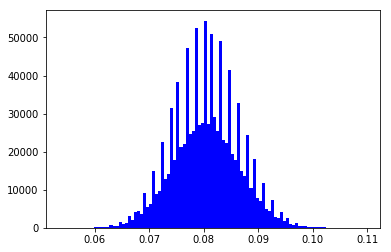

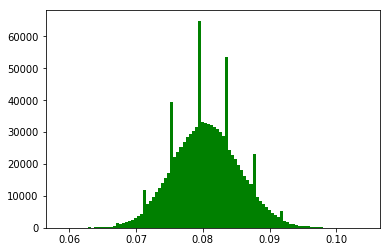

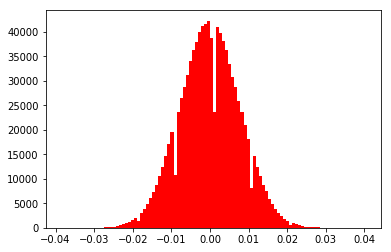

95% confident that the observed difference of the means between 2 groups is in the range  [-0.0151951   0.01519505] if the expected numbers of callbacks for black-sounding names and white-sounding names are the same

margin of error (defined as the radius of the confidence interval) =  0.015195049345493317

empirical different means =  0.03203285485506058
p-value = 1.1e-05


In [7]:
# Compute initial difference btw 2 groups
empirical_diff_means = np.mean(ww) - np.mean(bb)

# Compute mean proportion of all groups: mean_p
mean_p = (sum(ww)+sum(bb))/(len(ww)+len(bb))

# Generate shifted arrays
ww_shifted = ww - np.mean(ww) + mean_p
bb_shifted = bb - np.mean(bb) + mean_p

# Check 
print('the following 3 values must be the same')
print('mean_p = ',mean_p)
print('mean_ww_shifted = ',np.mean(ww_shifted))
print('mean_bb_shifted = ',np.mean(bb_shifted))

# Compute 1,000,000 bootstrap replicates from shifted arrays
bs_replicates_ww = draw_bs_reps(ww_shifted, np.mean, size=1000000)
bs_replicates_bb = draw_bs_reps(bb_shifted, np.mean, size=1000000)

# Plot histograph of bs_replicates for testing
plt.clf()
plt.hist(bs_replicates_ww,bins=100, color = 'blue')
plt.show()

plt.hist(bs_replicates_bb,bins=100, color = 'green')
plt.show()

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_ww - bs_replicates_bb

plt.hist(bs_replicates, bins=100, color = 'red')
plt.show()

# Compute confidence interval and margin of error
conf_int_boot = np.percentile(bs_replicates,[2.5,97.5])
print('95% confident that the observed difference of the means between 2 groups is in the range ', conf_int_boot, 'if the expected numbers of callbacks for black-sounding names and white-sounding names are the same')
print('')

margin_boot = conf_int_boot[1]
print('margin of error (defined as the radius of the confidence interval) = ',margin_boot)
print('')

# Compute and print p-value: p
p = np.sum(bs_replicates > empirical_diff_means) / len(bs_replicates)
print('empirical different means = ',empirical_diff_means)
print('p-value =', p)

#### Bootstrap Answer: reject the null hypothesis. There is difference in the expected numbers of callbacks for black-sounding names and white-sounding names.

#### Frequentist Statistical Approach

In [9]:
# Calculate Standard Deviation of the distribution of the sample proportion of white-sounding names minus
# the sample proportion of black-sounding names.

# Note: the formation is: std = sqrt(2*p*(1-p)/n) in which n is the sample size, p is the true proportion with an
# assumption from the null hypothesis that p1 = p2 = p
# We do not know p, but we can estimate it using our samples. Because we assumed that there is no difference
# between black-sounding names group and white-sounding names group, we can combine our samples as a big one 
# of size 2*n, and use this sample proportion to estimate that true proportion p. Because of this estimation,
# the result will be a standard error.

big_sample_proportion = (sum(ww)+sum(bb))/(len(ww)+len(bb)) #this big sample's size is 2*n
se = np.sqrt(2*big_sample_proportion*(1-big_sample_proportion)/len(ww))

# Calculate z-score
z_score = (empirical_diff_means - 0)/se # mean is 0

# Calculate p-value
p_value = stats.norm.sf(abs(z_score)) #one-sided

# Compute 95% confidence interval & margin of error
conf_int_z = np.array([-1.96*se,1.96*se])
margin_z = 1.96*se

print('confidence interval = ',conf_int_z)
print('margin of error = ', margin_z)
print('')
print('empirical difference = ',empirical_diff_means)
print('')
print('z-score = ',z_score)
print('p-value = ',p_value)

confidence interval =  [-0.01528191  0.01528191]
margin of error =  0.015281912310894095

empirical difference =  0.03203285485506058

z-score =  4.108412235238472
p-value =  1.991942704752209e-05


**Frequentist Approach Answer: reject the null hypothesis. There is difference in the expected numbers of callbacks for black-sounding names and white-sounding names.**

### Question 4. Write a story describing the statistical significance in the context or the original problem.

The null hypothesis assumes that there is no significant difference between the expected numbers of callbacks for black-sounding names and white-sounding names, given all other parameters are the same. In this study, 2 groups of black-sounding names and white-sounding names were created, and the difference in the rate of callbacks between them was found to be 0.032 (3.2%). If the assumption is correct, then the probability of getting this difference is 1.99e-05. Since this probability is much smaller than the proposed significance level of 5%, we can reject the initial assumption and conclude that there is statistically significant difference in the callback rates for black-sounding names & white-sounding names.

### Question 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
This analysis only takes into account the single effect of race/name in callback success when all other parameters are the same between the 2 groups. This result may vary when other parameters, such as skills, education levels, years of experience are different between 2 groups. Thus, it does not mean that race/name is the most important factor in callback success. The conclusion could be amended as below:

Given all other parameters the same, it is found that there is statistically significant difference in the callback rates for black-sounding names & white-sounding names. Specifically in this study, callback rate of white-sounding names was found to be 3.2% more than that of black-sounding names.